<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Modelos de regresión</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.la<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Modelos de regresión

- Los modelos de regresión son aquellos que permiten predecir **valores objetivos numéricos**.
- Ejemplos de modelos de regresión
    * K-Nearest Neighbors (KNN)
    * Regresión Lineal
    * Regresión Logística
    * Support Vector Machines (SVMs)
    * Árboles de decisión y Bosques Aleatorios
    * Redes Neuronales
    * Etc.
- Todo los modelos predictivos se entrenan en base a una **función de costo**

<img src="images/regression_models.png" alt="" width="600px" align="center"/>

# Regresión lineal

- Modelo que permite realizar predicciones bajo el *supuesto* que los datos se comportan de manera lineal
- **Recordatorio:** Ecuación de la recta 2-Dimensiones

$$ y = m x + b$$
    
- $m$ : pendiente de la recta
- $b$ : intercepto con el eje y


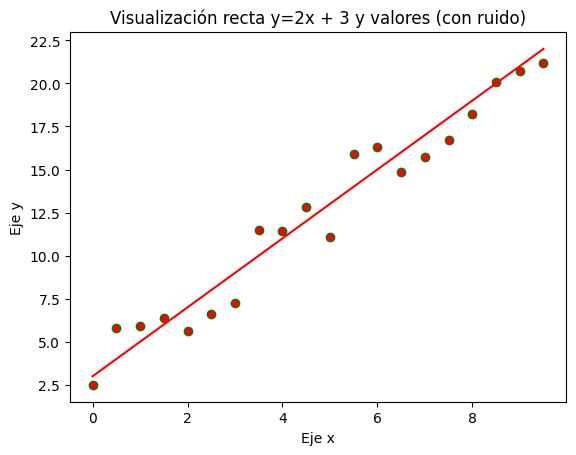

In [1]:
# Código creado por el profesor para generar datos "similares" a una 
# línea recta
import numpy as np
import matplotlib.pyplot as plt
# Semilla para el generador aleatorio. 
# 42 porque es el significado del universo, la vida y todo lo demás :)
np.random.seed(42) 

x = np.arange(0,10,0.5) # Generar todos los valores en el eje x
# La ecuación de la recta es y = mx + b
# En este caso, la ecuación de la línea recta que generó estos datos es
# y = 2x + 3
m = 2 # Pendiente
b = 3 # Intercepto
y = m*x + b # Recta con pendiente m=2 e intercepto b = 3
# Datos aleatorios a partir de la recta
y_noise = (4*np.random.rand(len(y)) - 2) + y # Agregar ruido a los datos para emular una situación real

# y_noise representa los datos con los que tu trabajarías en la realidad

plt.plot(x,y_noise,'go', markerfacecolor="#ff0000")
plt.plot(x, y, '-r')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Visualización recta y=2x + 3 y valores (con ruido)')
plt.show()

- Generalización: plano n-dimensional

$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- $\theta_j$ pendiente en la dimension $j$
- $\theta_0$ intercepto con eje $y$. También es llamado **bias** (prejuicio)

Al entrenar un modelo de regresión lineal intentamos encontrar **cuál es el hiperplano (parámetros $\theta_i$) que mejor predice el conjunto $y$ a partir de los datos $x_i$**. Para ello se busca minimizar el error cuadrátco medio (función de costo para la regresión lineal):

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( \theta^T X - y \right)^2$$

# Regresión Lineal con Scikit-Learn

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
X = x.reshape(-1,1) # Generación de vector columna
lin_reg.fit(X, y_noise) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_, '. El bias real es ', b)
print('La pendiente calculada es: ', lin_reg.coef_, '. La pendiente real es ', m) 
# lin_reg.coef es una lista porque pueden ser múltiples parámetros

# # Predicción
print('Para x=20, el valor predecido (y) es',lin_reg.predict([[20]]))
print('Valor real para x=20 es', m*20 + b)

El bias calculado es 3.2729298475154724 . El bias real es  3
La pendiente calculada es:  [1.90692196] . La pendiente real es  2
Para x=20, el valor predecido (y) es [41.41136903]
Valor real para x=20 es 43


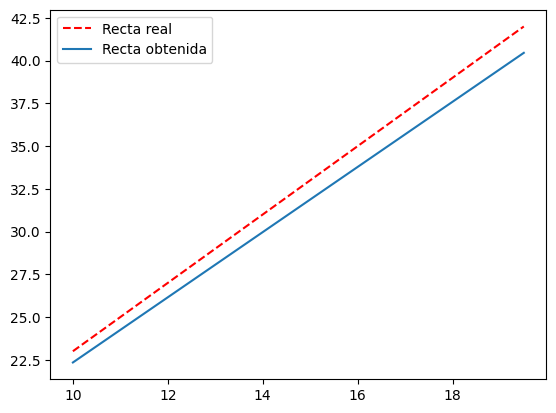

In [3]:
# Predicción con nuevos valores
X_new = np.arange(10,20,0.5).reshape(-1,1)
y_new = m*X_new + b # Recta original y = 2x + 3
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X_new, y_new, '--r')
ax.plot(X_new, lin_reg.predict(X_new))
ax.legend(['Recta real','Recta obtenida'])
plt.show()

# Métricas para modelos de regresión

- Para determinar el rendimiento de un modelo de regresión, es necesario contar con métricas que nos indiquen lo bien (o no) que funciona un modelo.
- Mientras más cercano a 1 $R^2$, mejor es tu modelo, y mientras más cercano a 0, peor.
- Considerando $y_i$ el valor objetivo $i$-ésimo e $\hat{y}_i$ la predicción $i$-ésima, podemos definir las siguientes métricas de evaluación:

**Coeficiente de determinación $R^2$**: Utilizado para evaluación de modelos. Valor entre 0 y 1.
    $$R^2 = 1 - \frac{\text{MSE}}{\text{Var}(y)}$$
    
- Recordatorio: La varianza de un conjunto de datos $y$ se define como:
  $$ \text{Var}(y) = \sigma^2 = \frac{1}{n} \sum_{i=1}^n \left( y_i - \overline{y} \right)^2$$

In [4]:
from sklearn.metrics import r2_score

# Predicciones a partir de la columna de características X_new
y_hat = lin_reg.predict(X_new)

# R^2 tiene dos entradas r2_score(valores_reales, valores_de_predicción)
print("Valor de métrica R2:",r2_score(y_new, y_hat))

Valor de métrica R2: 0.9614450440571372


In [5]:
# El R2 es tan popular en los modelos de regresión que es definido como el "score oficial"
lin_reg.score(X_new, y_new)

0.9614450440571372

**Error Absoluto Medio (MAE)**: Utilizado para evaluar el error de predicción. Importancia del error varía linealmente con su valor.  
    $$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} | y_i - \hat{y}_i  | $$

- A diferencia del $R^2$, mientras más pequeño es este valor (más cercano a 0), mejor es tu modelo. Mientras más grande es este número, peor es tu modelo.

In [6]:
from sklearn.metrics import mean_absolute_error

# Predicciones
y_hat = lin_reg.predict(X_new)

# MAE
print("Valor de métrica MAE:",mean_absolute_error(y_new, y_hat))

Valor de métrica MAE: 1.0999712546706006


**Error Cuadrático Medio (MSE)**: Utilizado para evaluar el error de predicción. Errores grandes se incrementan y errores pequeños se atenúan. Sin interpretación sencilla.
    $$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 $$

- Al igual que en el MAE, mientras más cercano a 0 sea el valor, mejor es nuestro modelo y mientras más grande sea el error, peor es nuestro modelo.

In [7]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_hat = lin_reg.predict(X_new)

# MSE
print("Valor de métrica MSE:",mean_squared_error(y_new, y_hat))

Valor de métrica MSE: 1.2819522851001899


**Raíz del Error Cuadrático Medio (RMSE)**: Utilizado para evaluar el error de predicción. Errores grandes se incrementan y errores pequeños se atenúan. Fácil de interpretar.
    $$\text{RMSE} = \sqrt{ \frac{1}{n}  \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2} $$

In [8]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_hat = lin_reg.predict(X_new)

# RMSE
print("Valor de métrica RMSE:",mean_squared_error(y_new, y_hat, squared=False))

Valor de métrica RMSE: 1.1322333174307273


C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Sesgo y Varianza

El error de generalización de un modelo predictivo depende de tres tipos de errores:

- **Sesgo (bias)**: Error de generalización causado por supuestos incorrectos (Ej. Usar un modelo de regresión lineal en datos que se comportan de manera cuadrática)
- **Varianza**: Excesiva sensibilidad del modelo a pequeñas variaciones en el set de entrenamiento. (Ej. Usar un modelo de regresión polinomial de grado superior sobre datos que se comportan de manera cuadrática)
- **Error irreducible**: Tipo de error inherente a los datos (un error que no se puede reducir). (Ej. El error de un sensor de temperatura)

En la mayoría de los casos el sesgo y la varianza son los únicos errores de los cuales tenemos control absoluto ante un dataset concreto, sin embargo en ocasiones es posible reducir el error irreducible:
- Limpiando los datos
- Adquiriendo más datos para nuestro dataset

Normalmente intentar reducir los errores de sesgo y varianza puede producir nuevos problemas, los cuales que hay que siempre tener presente:
- **Subajuste (underfitting)**: Se produce cuando tenemos un alto bias (por tanto muy baja varianza). 
- **Sobreajuste (overfitting)**: Se produce cuando tenemos una alta varianza (por tanto muy bajo bias).

<img src="images/under_over_fitting.png" alt="" width="600px" align="center"/>

Comparación de underfitting (línea roja), overfitting (línea verde) y mejor modelo (línea azul) sobre un set de datos (puntos azules)

# Árboles de decisión (Decision Trees)

- Versátil algoritmo de ML
- Puedes ser usado para clasificación y regresión
- Componente básica para los algoritmos de Bosques Aleatorios (Random Forest)

Un árbol de decisión aplicado a regresión cuenta con los siguientes elementos 
- **Nodes**: Cada una de las agrupaciones que genera el árbol de decisión. Dentro de los nodos se destaca el **nodo raíz** (nodo inicial) y los **nodos hojas** (aquellos que no tienen nodos hijos).
- **Depth**: Corresponde a la "altura" del árbol (cuántos niveles tiene).
- **Samples**: Número de instancias de entrenamiento a los cuales se les aplica un cierto nodo
- **Value**: Número de instancias de entrenamiento de cada clase se les aplica un cierto nodo
- **MSE**: Error Cuadrático Medio (explicado anteriormente).
           
Para clasificación con árboles de decisión, el MSE es reemplazado por una medición de impureza de los datos clasificados (medida de Gini, explicada en la siguiente unidad)

Predicción cuando $x1=0.7$ (supongamos que el $y1$ asociado a este valor de $x1$ es $y1=0.1$) 

<img src="images/ejemplo_decision_tree.png" alt="" width="600px" align="center"/>
Ejemplo árbol de decisión

Para el entrenamiento de un árbol de decisión, se utiliza el algoritmo *CART* (Classification and Regression Tree). Este opera dividiendo el dataset de entrenamiento en dos grupos en base a una característica $k$ y un umbral $t_k$ tales que $k$ y $t_k$ produzcan el menor MSE.
La función de costo queda definida de la siguiente manera:

$$ J(k, t_k) = \frac{n_{\text{left}}}{n} \text{MSE}_{\text{left}} + \frac{n_{\text{right}}}{n} \text{MSE}_{\text{right}}$$

donde $n_{\text{left/right}}$ representa el número de instancias en la hoja izquierda/derecha

<>:23: SyntaxWarning: invalid escape sequence '\h'
<>:23: SyntaxWarning: invalid escape sequence '\h'
C:\Users\sebac\AppData\Local\Temp\ipykernel_19608\3701491449.py:23: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{y}$", fontsize=18, rotation=0)


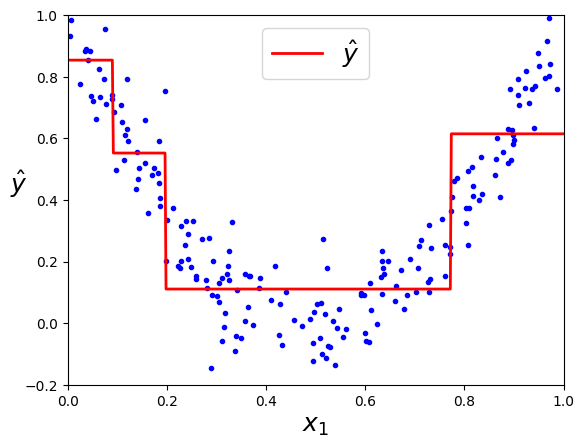

0.7966018355059643


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de data set cuadrático con ruido
np.random.seed(42)
n = 200
X = np.random.rand(n, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(n, 1) / 10

# Ejemplo de árbol de decisión para regresión
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2) # Prueba cambiar el hiperparámetro de profundidad máxima!
tree_reg.fit(X, y)

# Predicciones para distintos valores de x
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

# Gráficos
plt.axis([0, 1, -0.2, 1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$\hat{y}$", fontsize=18, rotation=0)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r-", linewidth=2, label=r"$\hat{y}$")
plt.legend(loc="upper center", fontsize=18)
plt.show()
print(tree_reg.score(X, y))
# También se puede ajustar el número máximo de hojas y otros parámetros para obtener el mejor modelo posible.
# Más en la documentación de scikit-learn 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [10]:
# Visualizando árbol de decisión
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_reg,
    feature_names=['x1'],
    class_names=['y'],
    rounded=True,
    filled=True
)

[Text(0.5, 0.8333333333333334, 'x1 <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'x1 <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'x1 <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

# Aprendizaje ensamblado (Ensemble Learning)

- Se basa en el concepto "la sabiduría de la multitud" (wisdom of the crowd)
- Entrenar múltiples predictores y juntar sus respuestas, a menudo obtendrás mejores predicciones que la predicción del mejor predictor.
- Respuesta final puede ser por votación (mayor cantidad de votos, gana), promedio, etc.

<img src="images/ensembleLearning.png" alt="" width="800px" align="center"/>

# Bagging and pasting

- Ante un modelo ensamblado, podemos entrenar un mismo clasificador tomando diferentes muestras de nuestro set de datos **con o sin reemplazo**
    - Entrenamiento con reemplazo: *bagging*
    - Entrenamiento sin reemplazo: *pasting*

# Bagging and pasting (ejemplo)

- Entrenamiento de 100 árboles de decisión ensamblados
- Cada uno entrenado con 200 muestras con reemplazo (bagging (para pasting, bootstrap=False)) 

In [11]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor # Ojo, este mismo funciona para pasting
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

# Carga de datos, referencia: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# División training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definimos nuestro modelo ensamblado
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=100,
    max_samples=200, bootstrap=True, # Si se desea probar pasting, cambiar parámetro bootstrap=False 
    random_state=42
)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Predicciones:",y_pred)
print("Valores reales:", y_test)
print("Score:", bag_reg.score(X_test, y_test)*100) # R^2 score

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sebac\AppData\Local\Temp\ipykernel_19608\3571725763.py:10: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Predicciones: [22.488 32.316 16.748 23.973 17.165 21.852 19.06  14.659 21.021 20.514
 19.611 20.576  8.153 21.826 19.686 26.336 18.927  9.166 44.049 15.103
 24.332 24.126 14.252 22.416 14.991 15.221 21.891 13.667 19.646 20.687
 20.221 23.411 27.838 20.498 14.251 15.869 34.747 19.54  21.185 23.975
 18.15  29.179 44.168 19.725 22.354 14.079 15.776 24.368 18.722 27.687
 21.404 33.441 17.703 25.493 44.319 21.747 16.57  33.942 22.148 20.099
 25.23  34.197 31.831 19.514 26.364 16.239 13.872 23.135 28.313 15.667
 20.806 27.415 10.972 22.548 22.135  8.014 20.114 44.503 10.546 13.76
 21.376 12.064 19.794 10.145 20.861 26.117 17.49  23.523 23.745 17.634
 21.844  8.056 20.053 19.614 25.657 20.146 30.585 11.35  12.993 11.45
 20.697 23.214 12.623 20.108 20.647 12.693 19.352 25.083 20.71  23.474
  9.61  15.046 23.295 24.566 32.079 15.208 40.388 16.888 19.749 24.105
 19.377 23.868  8.546 20.545 24.566 22.319 23.971 34.942 17.132 44.378
 14.85  23.943 19.762 18.425 13.783 20.357 20.739 32.745 28.609 1

# Bosques aleatorios (Random Forests)

- Random Forests es un modelo ensamblado de árboles de decisión (como el presentado anteriormente)
- Su diferencia radica en que no solo se escoge una muestra de datos aleatoria para el entrenamiento de cada árbol, sino que también una muestra aleatoria de características (columnas) para cada árbol.
- Scikit-Learn entrega la clase RandomForestRegressor la cual es mucho más conveniente y optimizada a árboles de decisión.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Carga de datos, referencia: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# División training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rndf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rndf_reg.fit(X_train, y_train)
y_pred = rndf_reg.predict(X_test)
print("Predicciones:",y_pred)
print("Valores reales:", y_test)
print("Score:",rndf_reg.score(X_test, y_test)*100)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sebac\AppData\Local\Temp\ipykernel_19608\140980872.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Predicciones: [23.041 31.211 15.888 24.281 16.892 21.619 19.665 15.059 21.539 21.203
 19.87  20.264  8.059 21.301 19.167 24.745 18.93   8.439 45.792 15.162
 24.407 24.014 14.678 23.403 15.04  15.166 21.926 13.719 19.663 20.991
 19.669 23.337 30.817 20.166 14.335 16.091 33.912 18.958 21.034 23.992
 17.987 28.838 45.586 19.64  22.672 14.292 15.818 24.271 18.918 28.351
 21.511 34.044 17.916 25.806 45.257 21.729 15.874 31.855 22.059 20.324
 25.23  33.63  29.363 19.088 27.557 16.695 13.946 23.042 28.777 15.196
 20.715 27.365 10.448 22.377 22.29   6.657 19.968 46.049 11.222 12.605
 21.518 11.946 19.636  9.846 20.664 26.514 15.916 23.193 23.463 17.74
 21.958  7.578 19.853 19.074 22.949 19.452 37.23  11.906 12.332 12.421
 20.286 23.807 13.69  20.185 20.353 12.522 19.149 25.018 20.561 23.549
  9.489 14.991 22.767 25.697 31.703 14.526 41.875 16.278 19.869 24.061
 18.998 24.068  8.144 20.639 24.757 22.046 23.851 35.246 16.595 44.9
 15.394 23.663 19.462 18.524 14.113 20.584 20.686 31.568 28.923 16

# Grid Search Cross Validation

- La validación cruzada (cross validation) es un proceso iterativo de pruebas para determinar qué tan bien es capaz un modelo de generalizar a partir de un conjunto de datos.
- También es utilizado como proceso para determinar el mejor conjunto de hiperparámetros para entrenar un modelo.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Carga de datos, referencia: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# División training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A continuación crearemos una variable de tipo lista de diccionarios que tendrá la información 
# de nuestra búsqueda

# param_grid: variable de tipo de lista que contiene los conjuntos de 
# hiperparámetros a probar
param_grid = [
    {'n_estimators':[30,100,300]},
    {'n_estimators': [10,20,30], 'max_depth':[1,2,3]}
]

rndf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rndf_reg, param_grid, cv=5,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sebac\AppData\Local\Temp\ipykernel_19608\160042765.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [30, 100, 300]},
                         {'max_depth': [1, 2, 3],
                          'n_estimators': [10, 20, 30]}],
             return_train_score=True)

In [14]:
cvres = grid_search.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values) # Mostramos el r^2 y el n_estimator en cada prueba de validación

(np.float64(0.8083779152037909), {'n_estimators': 30})
(np.float64(0.810958537861756), {'n_estimators': 100})
(np.float64(0.8119922732520457), {'n_estimators': 300})
(np.float64(0.4794107980543897), {'max_depth': 1, 'n_estimators': 10})
(np.float64(0.4966458770422751), {'max_depth': 1, 'n_estimators': 20})
(np.float64(0.4776671953327149), {'max_depth': 1, 'n_estimators': 30})
(np.float64(0.6649414564386155), {'max_depth': 2, 'n_estimators': 10})
(np.float64(0.6892440231887822), {'max_depth': 2, 'n_estimators': 20})
(np.float64(0.6757619351521869), {'max_depth': 2, 'n_estimators': 30})
(np.float64(0.7430862641327526), {'max_depth': 3, 'n_estimators': 10})
(np.float64(0.7534402717181752), {'max_depth': 3, 'n_estimators': 20})
(np.float64(0.7757313616898667), {'max_depth': 3, 'n_estimators': 30})


Como verificamos que el bosque aleatorio de mejor desempeño es aquel con 300 árboles de decisión, ahora puedo entrenar mi modelo con dicho hiper parámetro sobre los datos de entrenamiento/testing

# Randomized Search Cross Validation

- A diferencia de Grid Search, Randomized Search utiliza los parámetros de búsqueda como base y selecciona aleatoriamente de ese conjunto para realizar validación cruzada.
- Menos preciso que Grid Search, pues solo prueba con algunos valores, pero mucho más rápido

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Carga de datos, referencia: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# División training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# param_grid: variable de tipo de lista que contiene los conjuntos de 
# hiperparámetros a probar
param_grid = [
    {'n_estimators':np.arange(1,1000,1)}
]

rndf_reg = RandomForestRegressor()

clf = RandomizedSearchCV(rndf_reg, param_grid, random_state=42,cv=5,
                         return_train_score=True)

clf.fit(X_train, y_train)

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sebac\AppData\Local\Temp\ipykernel_19608\588029995.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])}],
                   random_state=42, return_train_score=True)

In [18]:
cvres = clf.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.8103360996592711, {'n_estimators': 454})
(0.81294170389992, {'n_estimators': 794})
(0.8167906105987065, {'n_estimators': 210})
(0.8086106498988537, {'n_estimators': 310})
(0.8119833773765409, {'n_estimators': 741})
(0.813549167351046, {'n_estimators': 579})
(0.8124377050222483, {'n_estimators': 896})
(0.8129090847986452, {'n_estimators': 546})
(0.8131887580935203, {'n_estimators': 437})
(0.8134465325821065, {'n_estimators': 679})


## ¿Qué hacer al momento de entrenar un nuevo modelo con datos?

- Paso 0: Cargar los datos
- Paso 1: Entender los datos
    - Histogramas
    - Correlaciones (pandas tiene el método **corr()** para facilitar esto)
    - Correlaciones agrupadas (sumar, restar, etc, columnas de características)
    - Graficar
    - Si hay columnas poco importantes, sacarlas
    - etc.
- Paso 2: Dividir mi set de datos en entrenamiento y test (ojo, test no se toca sino hasta el final, para las pruebas)
- Paso 3: Escalamiento/transformación de datos (si es que aplica)
    - Para categorías, en la mayoría de los casos deberías
        * Transformar esa categoría a número
        * Codificar esos números con un OneHotEncoder u OrdinalEncoder dependiendo de cada caso
    - El escalamiento se utiliza cuando tienes columnas con distintas escalas
- Paso 4: Decidimos/probamos cuál es el modelo que vamos a utilizar
    - Probar con varios modelos distintos y quedarte con el que tenga una métrica mejor 
    - También puedes probar el mismo modelo entrenado con distintos sub set de datos (gridsearch/randomsearch) para determinar hiper parámetros
- Paso 5: Testear mi modelo utilizando el set de test (set de pruebas)
- Paso 6: Entregar métricas o gráficas de comportamiento de tu modelo

# Actividad 5

Scikit-Learn no es solo una potente herramienta para la aplicación de distintos algoritmos de ML, sino que también provee algunos populares set de datos con los cuales puedes probar tanto algoritmos de clasificación como de regresión

- Estudie los datasets disponibles en Scikit-learn [aquí](https://scikit-learn.org/stable/datasets/toy_dataset.html) y cómo utilizarlos.
- Descargue el dataset **Diabetes dataset** disponible en Scikit-Learn.
- Utilice los distintos modelos presentados para determinar el nivel de avance de la enfermedad (target) e indique cuál es el mejor modelo comparándolos

In [16]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.

In [44]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [45]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [49]:
y_pred

array([217.,  99., 170., 150., 139.,  93., 237., 248., 206., 197.,  90.,
       200.,  72., 220.,  86., 142., 310., 180., 293., 178., 137.,  59.,
        49., 150., 103., 127., 281., 150.,  59., 230., 279.,  55., 172.,
       292., 164., 200.,  64.,  94., 120.,  96.,  39., 109., 219., 131.,
       170.,  96.,  31., 170.,  39., 179., 141.,  72., 201., 179., 229.,
       142.,  53., 221.,  53.,  59., 131., 137., 142., 109., 151., 236.,
       126.,  69., 150., 206., 206., 281., 241.,  89.,  75., 229., 217.,
       178., 111., 229.,  49.,  25.,  59.,  39.,  49.,  52.,  71.,  72.,
       147.])

In [51]:
print(model.score(X, y))

0.8340932902727538
